In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataframe=pd.read_csv("waterQuality-new.csv")
df = pd.DataFrame(dataframe)
df.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


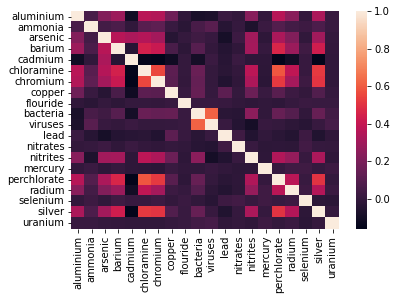

In [ ]:
df_1 = df.drop(['is_safe'], axis=1)

sns.heatmap(df_1.corr())

In [ ]:
avg_water  = df.groupby("is_safe").mean()
avg_water

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
is_safe,,,,,,,,,,,,,,,,,,,,
0,0.514576,14.347089,0.172618,1.528057,0.046117,2.004838,0.229520,0.798932,0.770532,0.322268,0.341726,0.099660,9.962069,1.320316,0.005233,15.979213,2.866671,0.050004,0.142483,0.045403
1,1.844079,13.711096,0.074624,1.875888,0.017081,3.513355,0.384814,0.859671,0.779594,0.299441,0.226451,0.097815,8.705680,1.404912,0.004888,20.198739,3.339211,0.047204,0.188947,0.039002


In [ ]:
fig = go.Figure()

for i in range(2):
    fig.add_trace(
                go.Scatterpolar(
                                r=avg_water.loc[i].values.tolist() + avg_water.loc[i].values.tolist()[:1],
                                theta=avg_water.columns.tolist() + avg_water.columns.tolist()[:1],
                                #name="Class-%s"%df.is_safe,
                                showlegend=True,
                                )
                )

fig.update_layout(
    polar=dict(
        radialaxis=dict(
                        visible=True,
                        range=[0, 2]
                    )
            ),

    title="Water Variables According to safe Categories"
)

fig.show()